Install Kaggle API and upload the dataset online

In [ ]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 45.9MB/s]


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

List various features of the dataset

In [ ]:
data= pd.read_csv('data.csv')
shapr
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

569
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     floa

In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Use the .describe, .groupby, .agg function to obtain statistically significant values and ranges

**Data cleaning techniques**

---



Correlation finding

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':10, 'B':0})
data['diagnosis'] = data['diagnosis'].replace(['B','1'])
df_new= data.dropna(subset=['diagnosis'])
df_new['diagnosis'] = df_new['diagnosis'].astype(int)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,10,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,10,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,10,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,10,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,10,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
feature_num=data.select_dtypes(include=['float64', 'int64'])
feature_num_corr= feature_num.corr()['diagnosis'][:-1]
best_corr=feature_num_corr[abs(feature_num_corr)>0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with diagnosis:\n{}".format(len(best_corr), best_corr))

There is 16 strongly correlated values with diagnosis:
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64


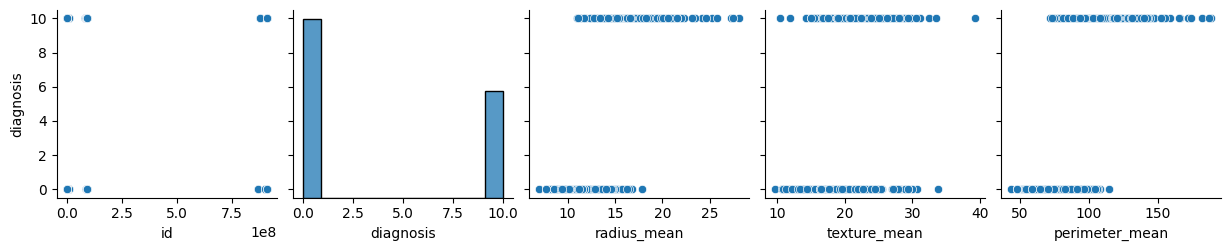

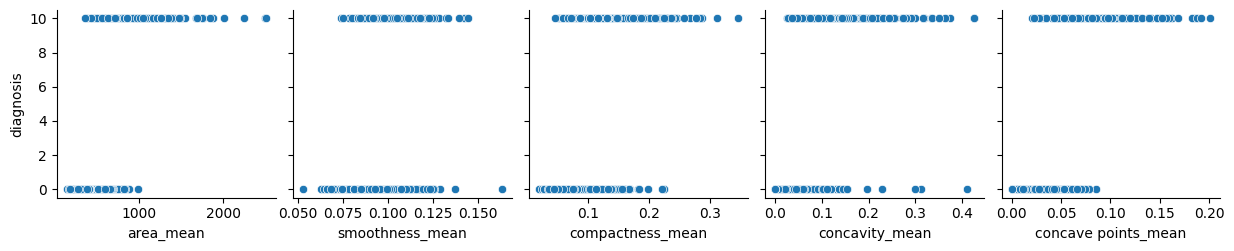

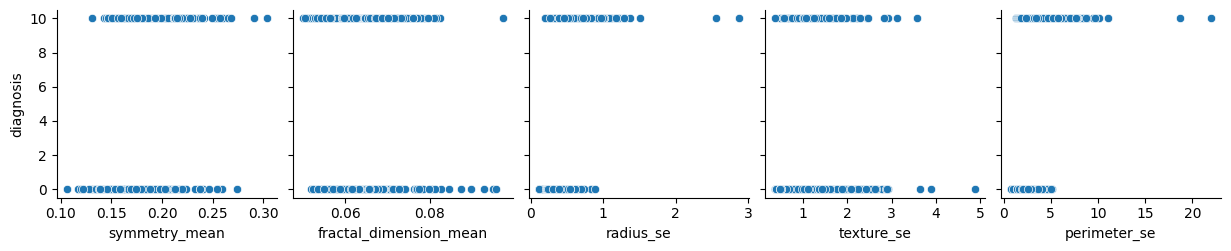

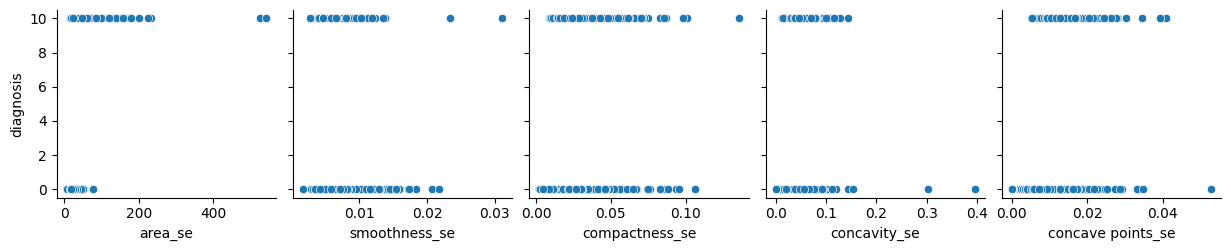

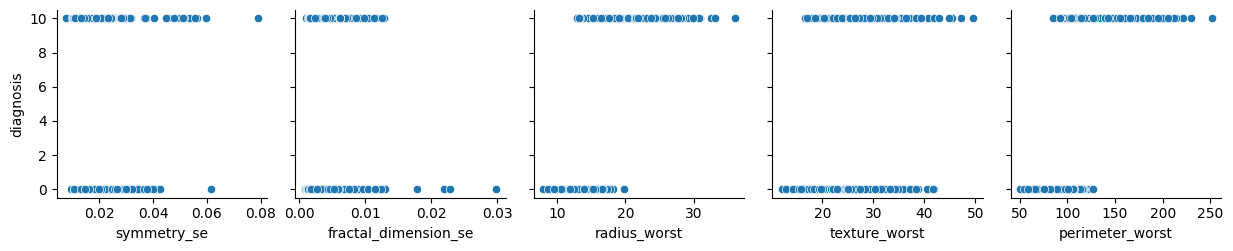

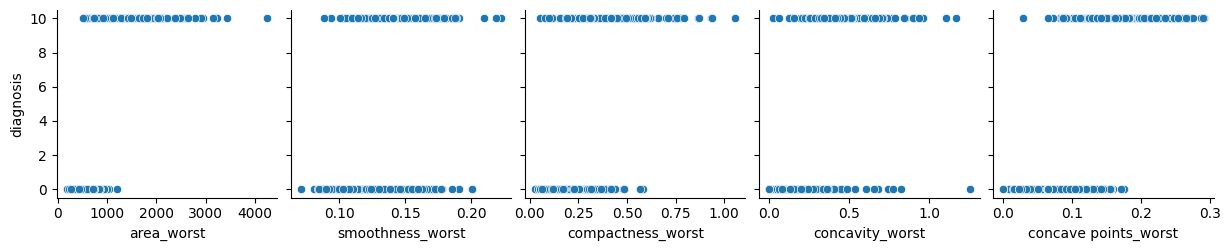

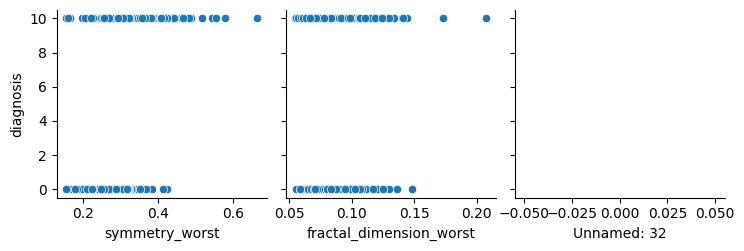

In [ ]:
for i in range(0, len(feature_num.columns), 5):
    sns.pairplot(data=feature_num,
                x_vars=feature_num.columns[i:i+5],
                y_vars=['diagnosis'])

Techniques for feature transformation 

Skewness: 1.401180


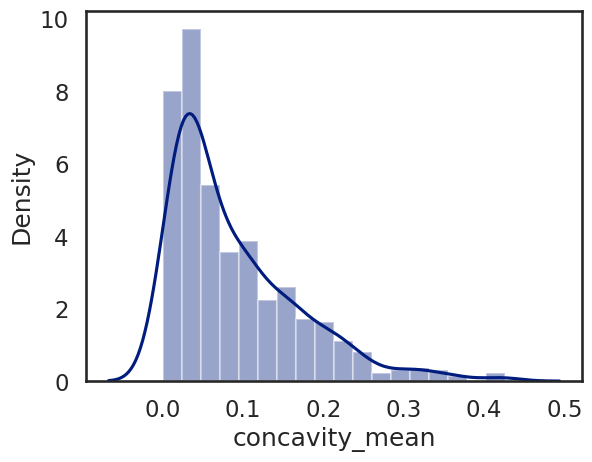

In [ ]:
sp_untransformed = sns.distplot(data['concavity_mean']) #Has a positive skew, and must be tranformed
print("Skewness: %f" % data['concavity_mean'].skew()) #Symmetrical bell curve distribution: -0.5-0.5; moderate skewed distribution: -0.5 to -1.0 and 0.5 to 1.0; highly skewed distribution: < -1.0 and > 1.0

Skewness: -0.913368


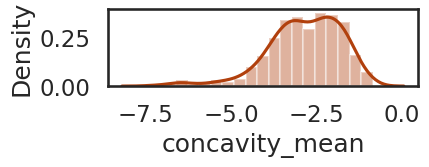

In [ ]:
data= data[data['concavity_mean'] != 0]
log_transformed = np.log(data['concavity_mean'])
sp_transformed = sns.distplot(log_transformed)
print("Skewness: %f" % (log_transformed).skew()) ##The data is still slightly skewed, and we need other operations for normalizing it

0.4867505036543632

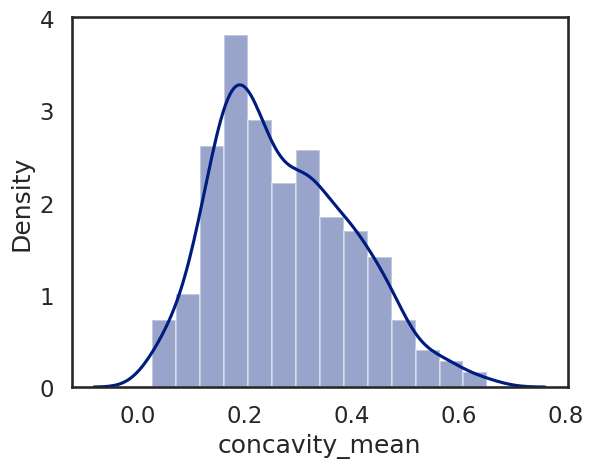

In [ ]:
concavity_sqrt=np.sqrt(data['concavity_mean'])
sp_sqrt = sns.distplot(concavity_sqrt)
concavity_sqrt.skew()

-0.034783271446202454

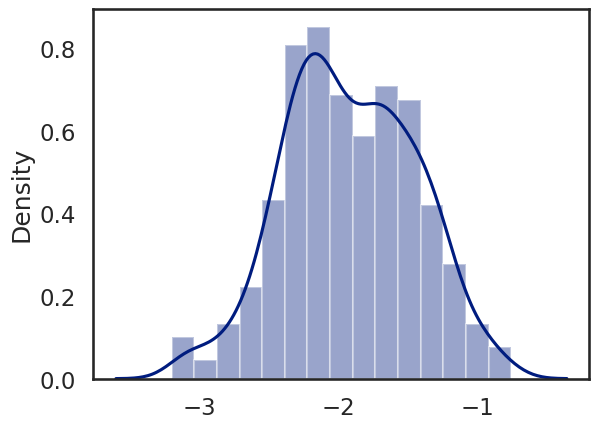

In [ ]:
concavity_boxcox=stats.boxcox(data['concavity_mean'])[0]
sp_boxcox = sns.distplot(concavity_boxcox)
pd.Series(concavity_boxcox).skew()

In [ ]:
duplicate = data[data.duplicated(['id'])]
df=data.drop_duplicates
# df.head()
# data.index.is_unique

Text(0.5, 1.0, 'Total Missing Values')

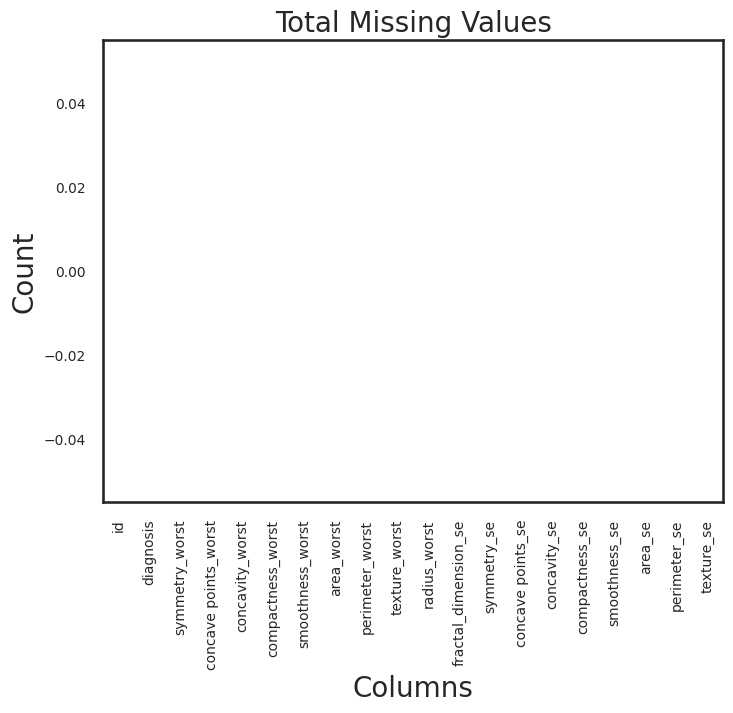

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)
# median = data["radius_mean"].median() #Not required as null values do not exist
# data["radius_mean"].fillna(median, inplace = True)

In [ ]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
mean,3.037183e+07,3.725835,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.08637,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
median,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.09587,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,10.000000,15.780000,21.800000,104.100000,782.700000,0.10530,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
range,9.113118e+08,10.000000,21.129000,29.570000,144.710000,2357.500000,0.11077,0.326020,0.426800,0.201200,...,37.520000,200.790000,4068.800000,0.151430,1.030710,1.252000,0.291000,0.507300,0.152460,NaN


Techniques for feature scaling

In [ ]:
norm_data = MinMaxScaler().fit_transform(data)
stnd_data = StandardScaler().fit_transform(data)
data_norm=pd.DataFrame(norm_data, columns= ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
data_stnd=pd.DataFrame(stnd_data, columns= ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
# scaled_radius_mean = StandardScaler().fit_transform(data['radius_mean'][:,np.newaxis]) #To specifically transform a feature

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


<Axes: xlabel='area_mean'>

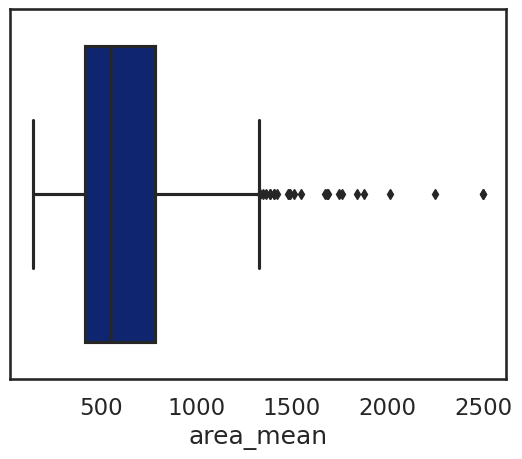

In [ ]:
sns.boxplot(x=data['area_mean'])

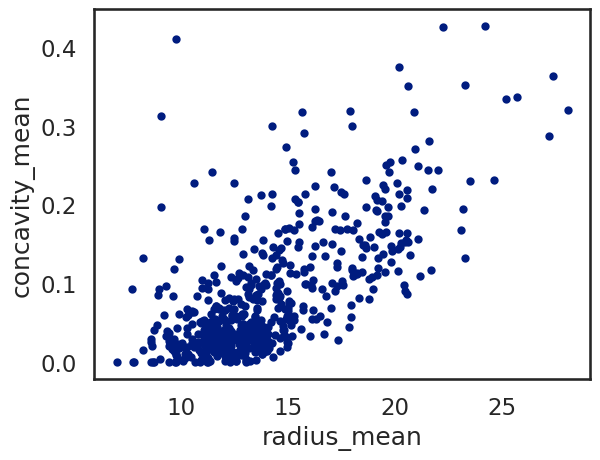

In [ ]:
radius_area = data.plot.scatter(x='radius_mean',
                      y='concavity_mean')

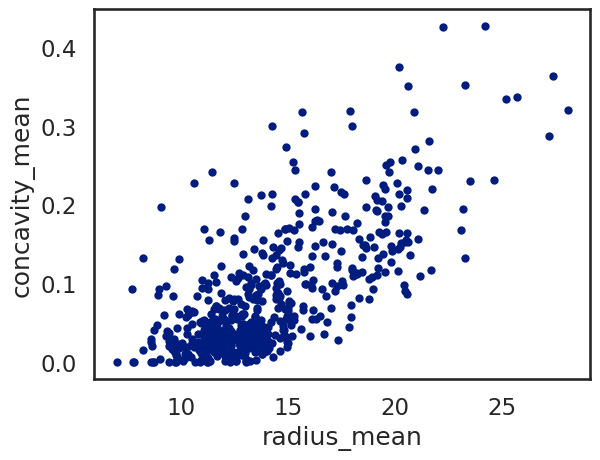

In [ ]:
data.sort_values(by = 'concavity_mean', ascending = False)[:15]
outliers_dropped = data.drop(data.index[[152,68]])
radius_area = outliers_dropped.plot.scatter(x='radius_mean',
                      y='concavity_mean')

In [ ]:
data['concavity_mean_stdev'] = stats.zscore(data['concavity_mean'])
data[['concavity_mean','concavity_mean_stdev']].describe().round(3) ##If any value is <-3, >+3, it falls outside the ambit of normal standard deviation and is hencce an outlier. Hence outliers in the data can be found.

,concavity_mean,concavity_mean_stdev
count,569.000,569.000
mean,0.089,0.000
std,0.080,1.001
min,0.000,-1.115
25%,0.030,-0.744
50%,0.062,-0.342
75%,0.131,0.526
max,0.427,4.244


In [ ]:
# # The mean calculation
# data.groupby('diagnosis').mean()
# # The median calculation
# data.groupby('diagnosis').median()

# applying multiple functions at once - 2 methods
data.groupby('diagnosis').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('diagnosis').agg([np.mean, np.median])

id           radius_mean         texture_mean         \
                   mean    median        mean  median         mean median   
diagnosis                                                                   
0          2.654382e+07  908916.0   12.146524  12.200    17.914762  17.39   
10         3.681805e+07  895366.5   17.462830  17.325    21.604906  21.46   

          perimeter_mean           area_mean         ... concavity_worst  \
                    mean  median        mean median  ...            mean   
diagnosis                                            ...                   
0              78.075406   78.18  462.790196  458.4  ...        0.166238   
10            115.365377  114.20  978.376415  932.0  ...        0.450606   

                  concave points_worst          symmetry_worst          \
           median                 mean   median           mean  median   
diagnosis                                                                
0          0.1412             0.074444  0.07431       0.270246  0.2687   
10         0.4049             0.182237  0.18200       0.323468  0.3103   

          fractal_dimension_worst          Unnamed: 32         
                             mean   median        mean median  
diagnosis                                                      
0                        0.079442  0.07712         NaN    NaN  
10                       0.091530  0.08760         NaN    NaN  

[2 rows x 64 columns]

In [ ]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'radius_mean'}
agg_dict['texture_mean'] = 'max'
pprint(agg_dict)

{'Unnamed: 32': ['mean', 'median'],
 'area_mean': ['mean', 'median'],
 'area_se': ['mean', 'median'],
 'area_worst': ['mean', 'median'],
 'compactness_mean': ['mean', 'median'],
 'compactness_se': ['mean', 'median'],
 'compactness_worst': ['mean', 'median'],
 'concave points_mean': ['mean', 'median'],
 'concave points_se': ['mean', 'median'],
 'concave points_worst': ['mean', 'median'],
 'concavity_mean': ['mean', 'median'],
 'concavity_se': ['mean', 'median'],
 'concavity_worst': ['mean', 'median'],
 'diagnosis': ['mean', 'median'],
 'fractal_dimension_mean': ['mean', 'median'],
 'fractal_dimension_se': ['mean', 'median'],
 'fractal_dimension_worst': ['mean', 'median'],
 'id': ['mean', 'median'],
 'perimeter_mean': ['mean', 'median'],
 'perimeter_se': ['mean', 'median'],
 'perimeter_worst': ['mean', 'median'],
 'radius_se': ['mean', 'median'],
 'radius_worst': ['mean', 'median'],
 'smoothness_mean': ['mean', 'median'],
 'smoothness_se': ['mean', 'median'],
 'smoothness_worst': ['mean'

Visualization for single feature correlation by matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

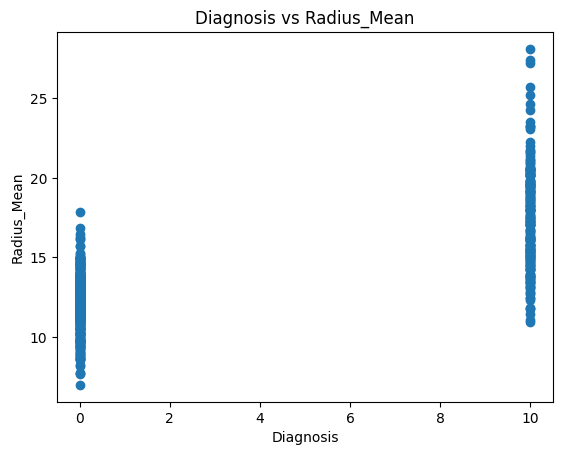

In [ ]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.diagnosis, data.radius_mean)

# Label the axes
ax.set(xlabel='Diagnosis',
       ylabel='Radius_Mean',
       title='Diagnosis vs Radius_Mean');

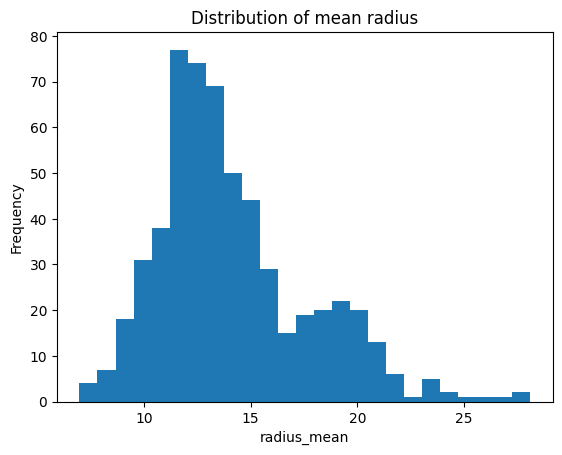

In [ ]:
# Using Matplotlib's histogram
ax = plt.axes()
ax.hist(data.radius_mean, bins=25);

ax.set(xlabel='radius_mean', 
       ylabel='Frequency',
       title='Distribution of mean radius');

Visualization for multiple feature correlation through Seaborn

In [ ]:
df2 = data[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean']] 

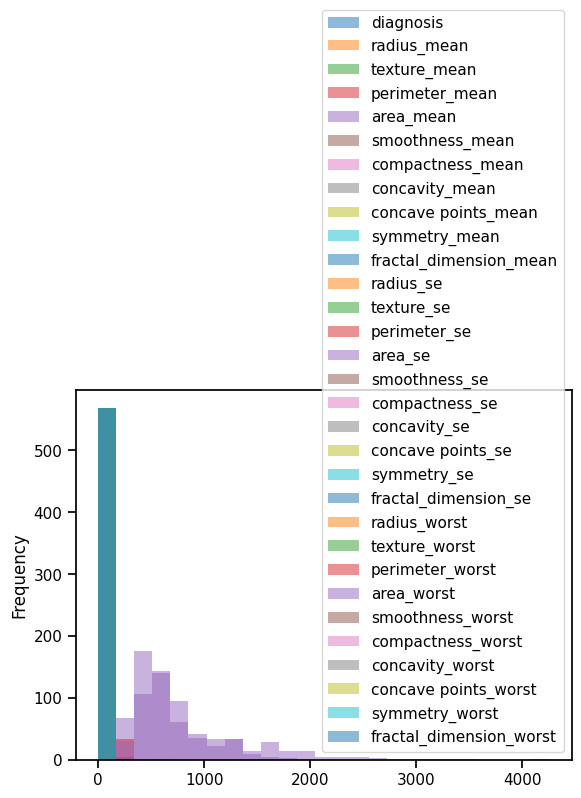

In [ ]:
#To visualize all features together
import seaborn as sns
sns.set_context('notebook')
df=data.drop(['id', 'Unnamed: 32'], axis=1)
ax = df.plot.hist(bins=25, alpha=0.5)

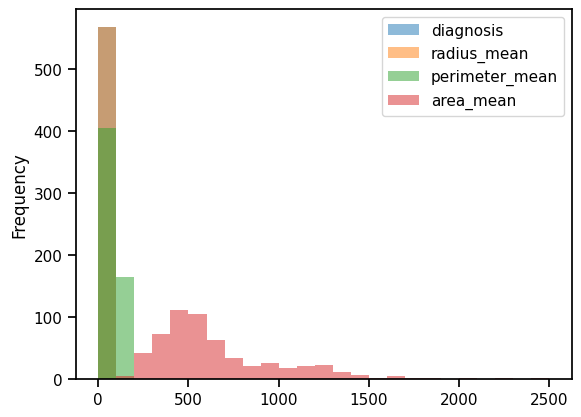

In [ ]:
#To visualize a few features together
import seaborn as sns
sns.set_context('notebook')
ax = df2.plot.hist(bins=25, alpha=0.5)

In [ ]:
#To visualize all features in separate histograms
axList = data.hist(bins=25, figsize=(15,90), layout=(32,2))

Error in callback <function flush_figures at 0x7f4ff3524280> (for post_execute):


KeyboardInterrupt: ignored

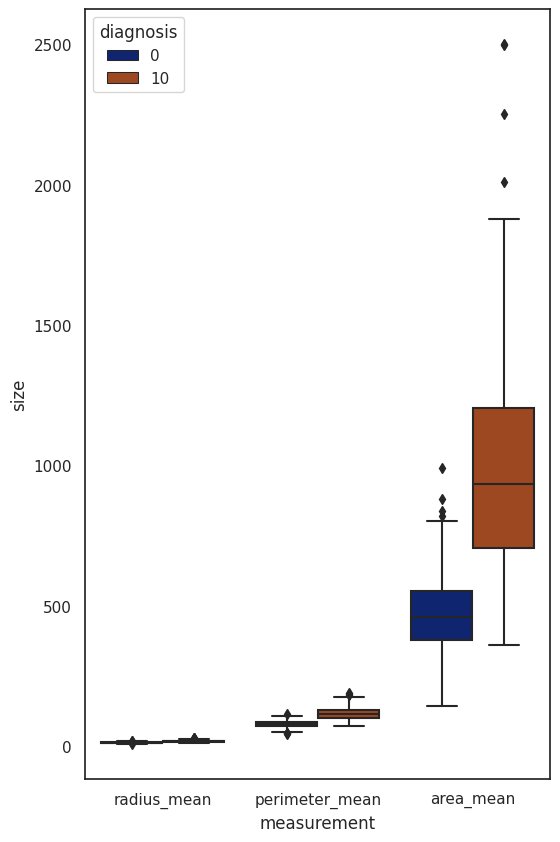

In [ ]:
#To visualize box plots of a few features in one plot
plot_data = (df2
             .set_index('diagnosis')  #Sets diagnosis as the index
             .stack()  #arranges it as a stack object
             .to_frame()  #converts it into a dataframe
             .reset_index()  #Reset index  of dataframe to the default one
             .rename(columns={0:'size', 'level_1':'measurement'}) #To rename column in the new dataframe
            )

# plot_data.head()
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,10))
sns.boxplot(x='measurement', y='size', 
            hue='diagnosis', data=plot_data);

KeyboardInterrupt: ignored

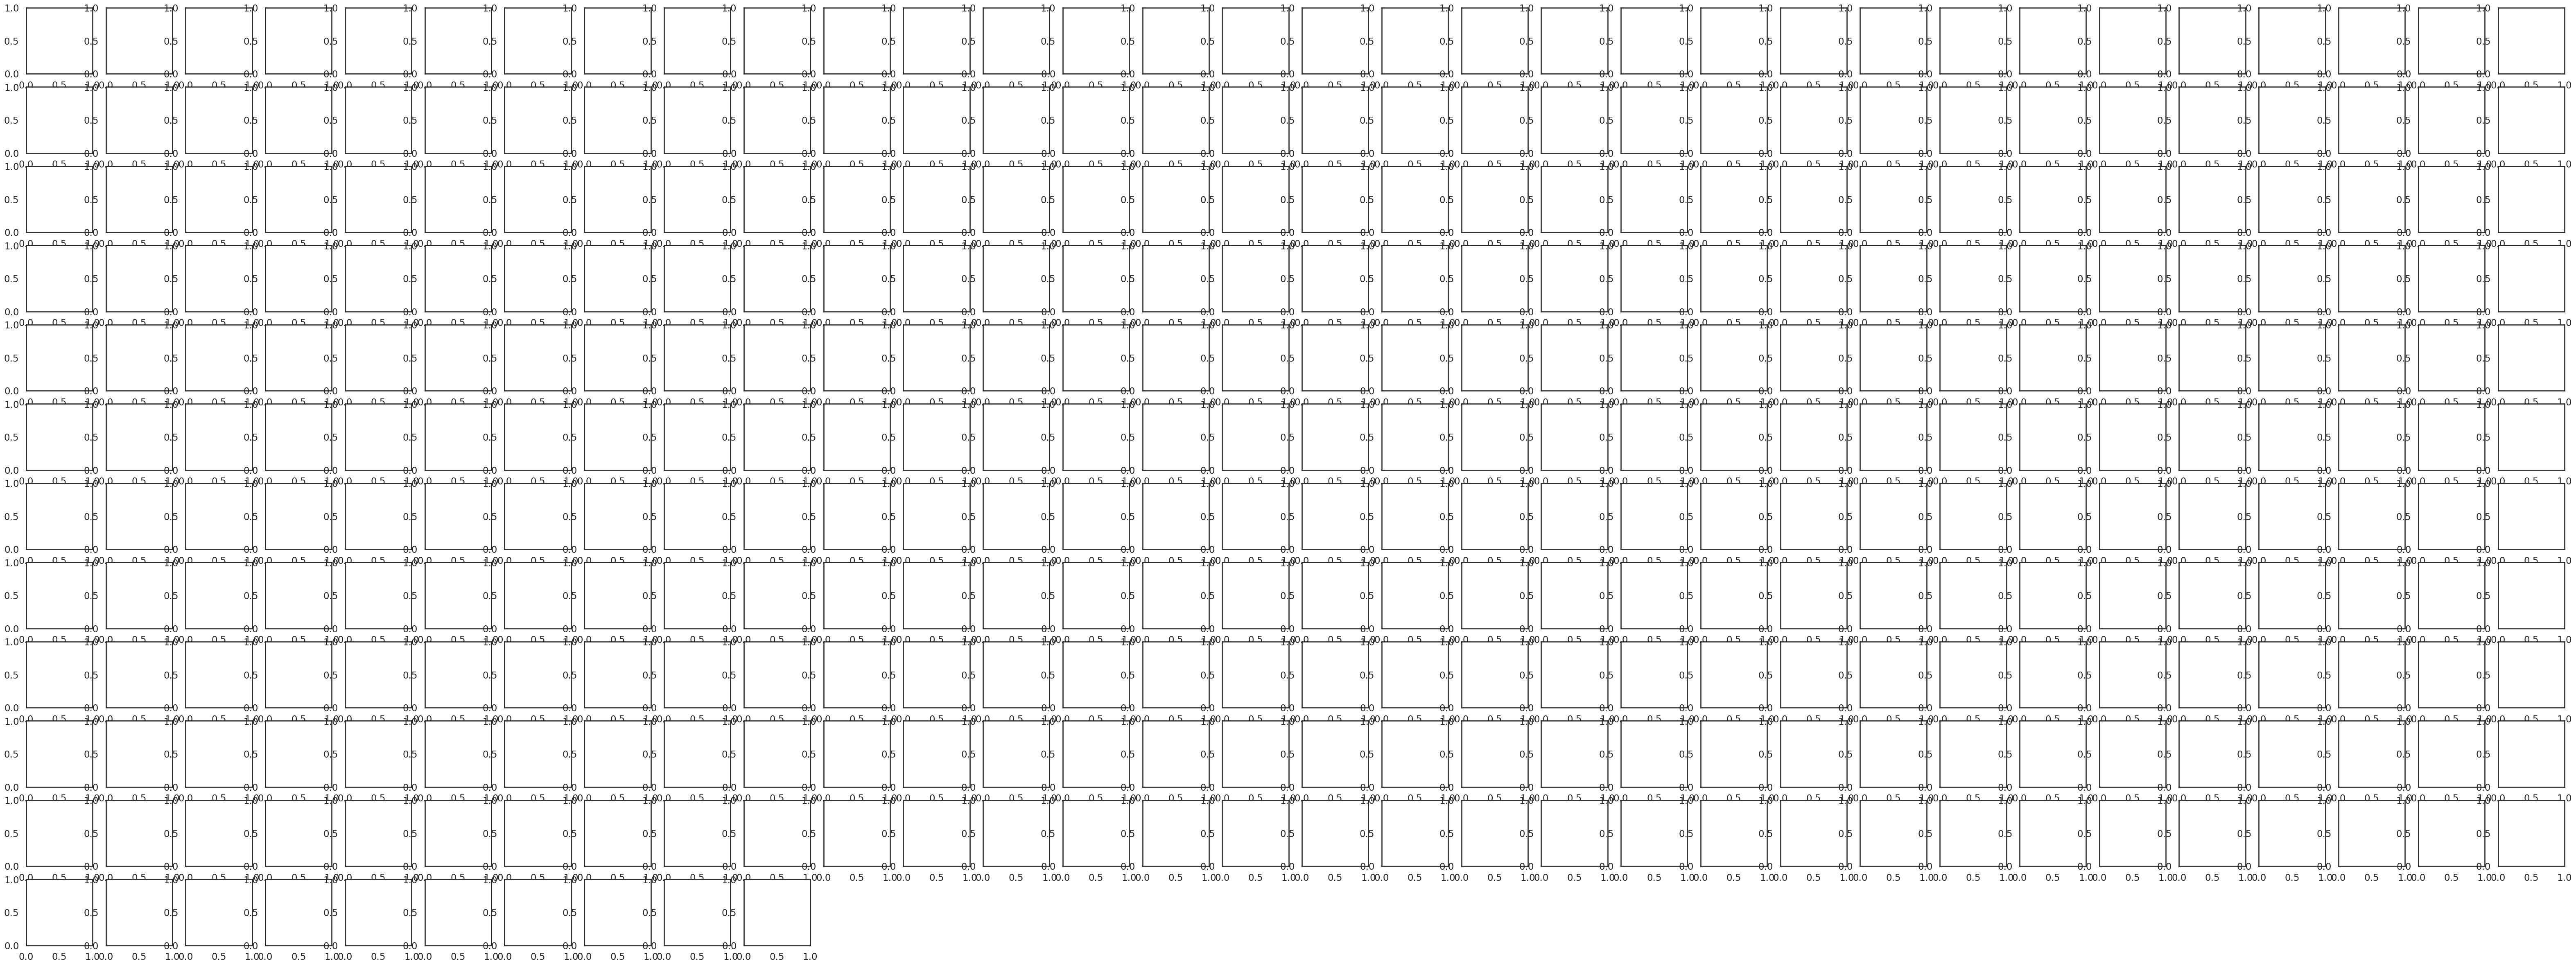

In [ ]:
sns.set_context('talk')
sns.pairplot(data, hue='diagnosis');